# Learning To Classify Text

Questions for this chapter (NLPP, p. 221):
 - How can we identify particular features of language data that are salient for classifying it?
 - How can we construct models of language that can be used to perform language processing tasks automatically?
 - What can we learn about language from these models?

# Supervised Classification

Examples of classification tasks (from NLTK, p. 222):
 - Deciding whether an email is spam or not.
 - Deciding what the topic of a news article is, from a fixed list of topic areas such as "sports," "technology," and "politics."
 - Deciding whether a given occurrence of the word 'bank' is used to refer to a river bank, a financial institution, the act of tilting to the side, or the act of depositing something in a financial institution.

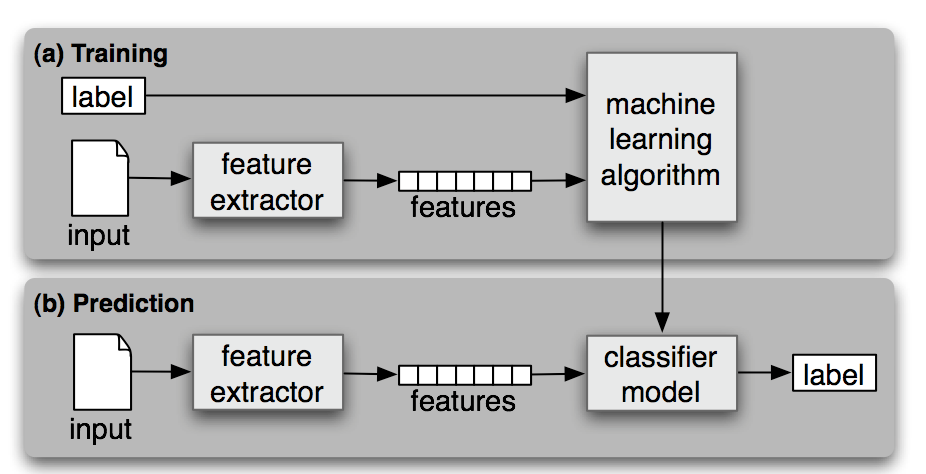

In [4]:
#Image(url = "http://localhost:8890/notebooks/NLTK_Chapter_6/classification.png")
from IPython.display import Image
Image("/Users/smirnova/anaconda2/NLTK_Chapter_6/classification.png", width=800, height=450)

## Document Classification

The following code classifies movie reviews as positive or negative.

In [1]:
import nltk
import random

In [2]:
# Import the corpus of movie reviews
from nltk.corpus import movie_reviews

In [3]:
# Examine the categories
movie_reviews.categories()

['neg', 'pos']

In [4]:
# Examine the files
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

In [5]:
list(movie_reviews.words('pos/cv995_21821.txt'))[:20]

['wow',
 '!',
 'what',
 'a',
 'movie',
 '.',
 'it',
 "'",
 's',
 'everything',
 'a',
 'movie',
 'can',
 'be',
 ':',
 'funny',
 ',',
 'dramatic',
 ',',
 'interesting']

In [6]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [7]:
# Each review is a tuple, consisting of a list (words of the review) and its category
documents[1]

(['eddie',
  'murphy',
  'has',
  'a',
  'lot',
  'riding',
  'on',
  'harlem',
  'nights',
  '.',
  'as',
  'the',
  'movie',
  "'",
  's',
  'writer',
  ',',
  'director',
  ',',
  'executive',
  'producer',
  ',',
  'and',
  'star',
  ',',
  'murphy',
  'will',
  'shoulder',
  'all',
  'of',
  'the',
  'blame',
  'if',
  'harlem',
  'nights',
  'fails',
  '.',
  'but',
  'at',
  'the',
  'same',
  'time',
  ',',
  'he',
  "'",
  'll',
  'receive',
  'all',
  'of',
  'the',
  'credit',
  'if',
  'it',
  'succeeds',
  '.',
  'should',
  'you',
  'sacrifice',
  'your',
  'hard',
  '-',
  'earned',
  'cash',
  'to',
  'support',
  'murphy',
  "'",
  's',
  'risky',
  'gamble',
  '?',
  'well',
  ',',
  'that',
  'depends',
  'on',
  'whom',
  'you',
  'trust',
  'more',
  ':',
  'me',
  'or',
  'eddie',
  'murphy',
  '.',
  'here',
  "'",
  's',
  'what',
  'murphy',
  'thinks',
  ':',
  '"',
  'i',
  'think',
  'the',
  'audience',
  'is',
  'expecting',
  'a',
  'good',
  'time',
  '.

In [8]:
# There are 2000 reviews in the corpus
len(documents)

2000

Our classification will be based on a somewhat simple principle: we will construct a list of the 2000 most frequent words and check if these words appear in a given document. 

In [31]:
#print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) # doctest: +SKIP

In [30]:
# Construct frequency distribution 
all_words2 = nltk.FreqDist(w.lower() for w in movie_reviews.words()).most_common()

In [33]:
all_words2[:20]

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961)]

In [34]:
# Identify 2000 most frequent words
word_features2 = list(i for (i, j) in all_words2[:2000])

In [35]:
word_features2[:20]

[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for']

In [37]:
# Construct the feature extractor
def document_features2(document): 
    document_words = set(document) 
    features = {}
    for word in word_features2:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [38]:
# Training and testing a classifier for document classification.
featuresets2 = [(document_features2(d), c) for (d,c) in documents]
train_set, test_set = featuresets2[100:], featuresets2[:100]
# Training the classifier
classifier2 = nltk.NaiveBayesClassifier.train(train_set)
#Computing accuracy
print(nltk.classify.accuracy(classifier2, test_set))

0.77


In [40]:
classifier2.show_most_informative_features(10)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.6 : 1.0
         contains(mulan) = True              pos : neg    =      9.0 : 1.0
        contains(seagal) = True              neg : pos    =      8.2 : 1.0
         contains(damon) = True              pos : neg    =      7.0 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.8 : 1.0
          contains(lame) = True              neg : pos    =      5.8 : 1.0
         contains(flynt) = True              pos : neg    =      5.7 : 1.0
         contains(awful) = True              neg : pos    =      5.5 : 1.0
        contains(wasted) = True              neg : pos    =      5.4 : 1.0
         contains(waste) = True              neg : pos    =      5.2 : 1.0
